In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
data = pd.read_csv('car_price_dataset.csv')

data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
data.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

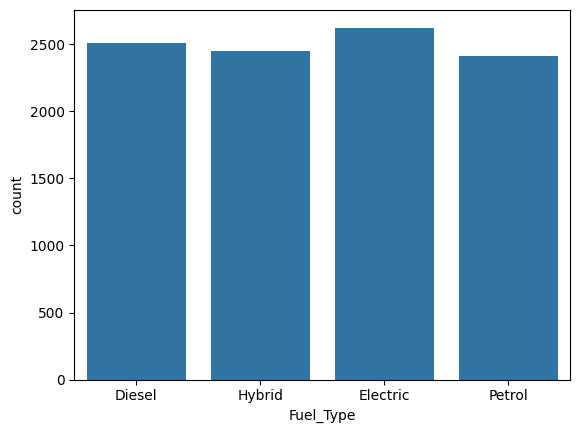

In [6]:
sns.countplot(x='Fuel_Type', data=data)

<Figure size 700x500 with 0 Axes>

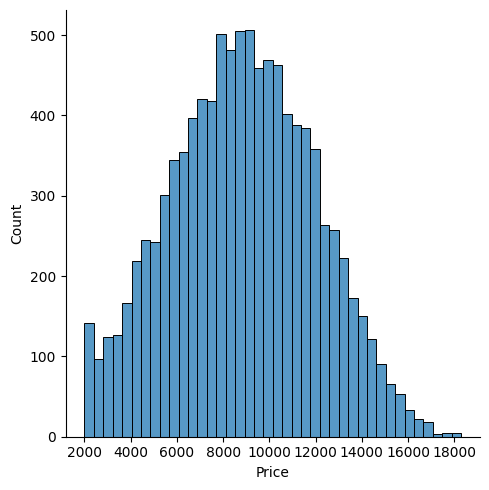

In [7]:
plt.figure(figsize=(7,5))
sns.displot(data["Price"])

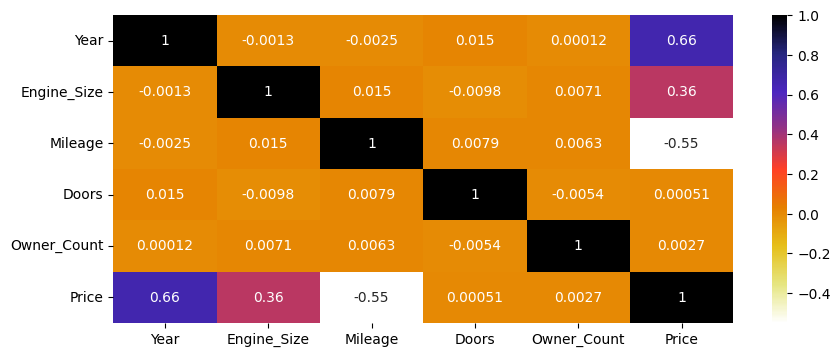

In [8]:
plt.figure(figsize = (10,4))
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r);

In [9]:
columns_to_drop = ["Doors", "Owner_Count", "Transmission"]
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Price
0,Kia,Rio,2020,4.2,Diesel,289944,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,5356,12092
2,Mercedes,GLA,2020,4.2,Diesel,231440,11171
3,Audi,Q5,2023,2.0,Electric,160971,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,286618,2867


In [10]:
df = pd.get_dummies(data, columns=["Fuel_Type", "Brand", "Model"], drop_first=True)
df.head()

,Year,Engine_Size,Mileage,Price,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,2020,4.2,289944,8501,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,2.0,5356,12092,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,4.2,231440,11171,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,11780,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2003,2.6,286618,2867,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

### LR


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 670.9822137509235
Root Mean Squared Error: 714.6310945974844
R2 Score: 0.9459417845721304


### Poly

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

y_poly_pred = poly_regressor.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regresyon (degree=2) - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regresyon (degree=2) - R^2 Score: {r2_poly}")



Polynomial Regresyon (degree=2) - Mean Squared Error: 517623.6059092856
Polynomial Regresyon (degree=2) - R^2 Score: 0.9452086551337389


### SVR

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


scaler = StandardScaler()
X_svr_train = scaler.fit_transform(X_train)
X_svr_test = scaler.transform(X_test)

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_svr_train, y_train)

y_svr_pred = svr_reg.predict(X_svr_test)

mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R^2 Score: {r2_svr}")


SVR - Mean Squared Error: 9247144.413042244
SVR - R^2 Score: 0.02117393260478395


### DT

In [16]:
from sklearn.tree import DecisionTreeRegressor
scaler = StandardScaler()
X_dt_train = scaler.fit_transform(X_train)
X_dt_test = scaler.transform(X_test)

tree_regressor = DecisionTreeRegressor(random_state=34)
tree_regressor.fit(X_dt_train, y_train)

y_tree_pred = tree_regressor.predict(X_dt_test)

mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print(f"Karar Ağacı Regresyonu - Mean Squared Error: {mse_tree}")
print(f"Karar Ağacı Regresyonu - R^2 Score: {r2_tree}")

Karar Ağacı Regresyonu - Mean Squared Error: 1177414.5727272728
Karar Ağacı Regresyonu - R^2 Score: 0.8753686517222569


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_rf_train = scaler.fit_transform(X_train)
X_rf_test = scaler.transform(X_test)

rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 34)
rf_reg.fit(X_rf_train,y_train.ravel())
y_rf_pred = rf_reg.predict(X_rf_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest Regresyonu - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regresyonu - R^2 Score: {r2_rf}")


C:\Users\mfurk\AppData\Local\Temp\ipykernel_6540\2998295843.py:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_reg.fit(X_rf_train,y_train.ravel())


Random Forest Regresyonu - Mean Squared Error: 700024.4918939394
Random Forest Regresyonu - R^2 Score: 0.9259012090787222


### LR PLT / OLS


In [18]:
X_train_numeric = X_train.copy()
X_train_numeric = X_train_numeric.applymap(lambda x: int(x) if isinstance(x, bool) else x)

modelr = sm.OLS(lr_model.predict(X_train_numeric), np.asarray(X_train_numeric))
print(modelr.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.619e+19
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:43:11   Log-Likelihood:                 70022.
No. Observations:                6700   AIC:                        -1.400e+05
Df Residuals:                    6664   BIC:                        -1.397e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           300.5858   1.24e-08   2.42e+10      0.0

C:\Users\mfurk\AppData\Local\Temp\ipykernel_6540\4018223950.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_numeric = X_train_numeric.applymap(lambda x: int(x) if isinstance(x, bool) else x)


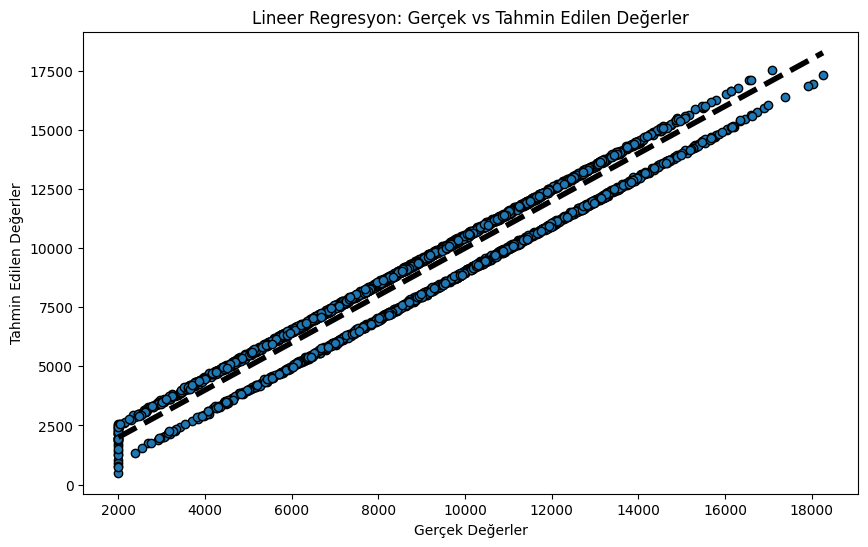

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Lineer Regresyon: Gerçek vs Tahmin Edilen Değerler')
plt.show()

### Poly PLT / OLS

In [20]:
modelpoly = sm.OLS(poly_regressor.predict(X_poly_train),X_poly_train)
print(modelpoly.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.465e+07
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:43:13   Log-Likelihood:                -16946.
No. Observations:                6700   AIC:                         3.427e+04
Df Residuals:                    6509   BIC:                         3.557e+04
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4558      0.031    -14.814      0.0

Text(0.5, 1.0, 'Polynomial Regresyon (degree=2): Gerçek vs Tahmin Edilen Değerler')

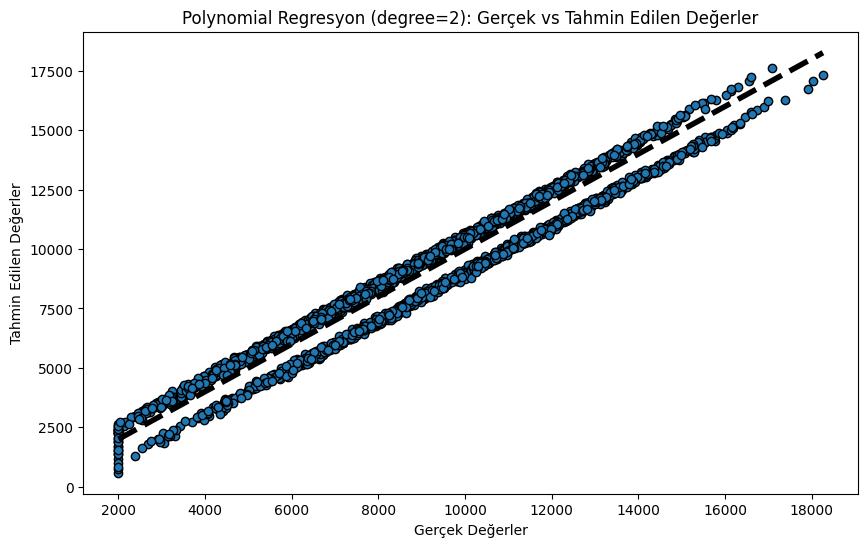

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Polynomial Regresyon (degree=2): Gerçek vs Tahmin Edilen Değerler')

### SVR PLT / OLS


In [22]:
model3 = sm.OLS(svr_reg.predict(X_svr_train),X_svr_train)
print(model3.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                           0.003580
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                        1.00
Time:                        15:43:18   Log-Likelihood:                         -70377.
No. Observations:                6700   AIC:                                  1.408e+05
Df Residuals:                    6665   BIC:                                  1.411e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'SVR: Gerçek vs Tahmin Edilen Değerler')

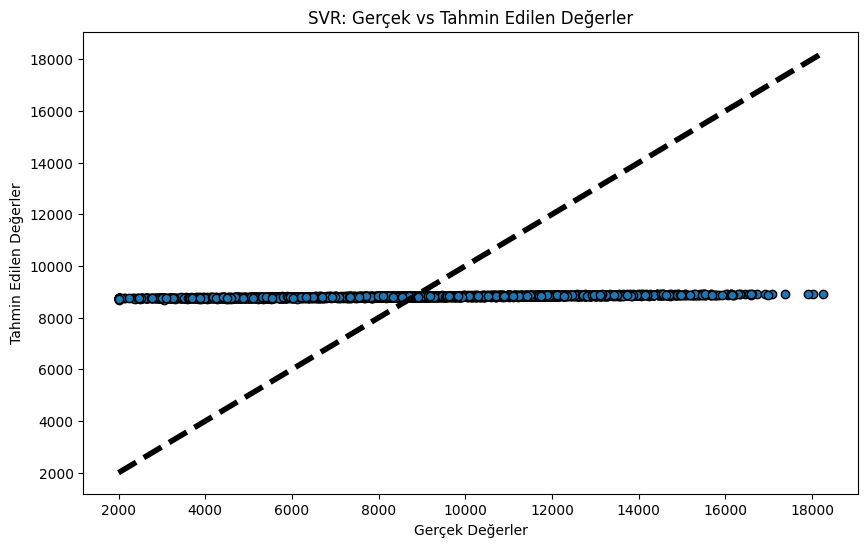

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_svr_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('SVR: Gerçek vs Tahmin Edilen Değerler')

### Decision Tree PLT / OLS

In [24]:
modeldt = sm.OLS(tree_regressor.predict(X_dt_train),X_dt_train)
print(modeldt.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.102
Method:                 Least Squares   F-statistic:                              22.66
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                   2.93e-135
Time:                        15:43:18   Log-Likelihood:                         -70393.
No. Observations:                6700   AIC:                                  1.409e+05
Df Residuals:                    6665   BIC:                                  1.411e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Karar Ağacı Regresyonu: Gerçek vs Tahmin Edilen Değerler')

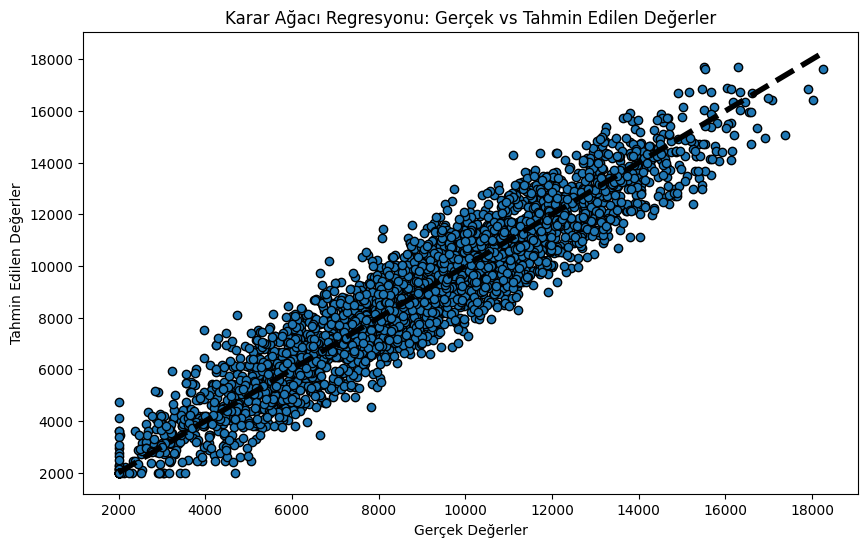

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tree_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Karar Ağacı Regresyonu: Gerçek vs Tahmin Edilen Değerler')

### Random Forest PLT / OLS



In [26]:
modelrf = sm.OLS(rf_reg.predict(X_rf_train),X_rf_train)
print(modelrf.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              22.33
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                   4.24e-133
Time:                        15:43:19   Log-Likelihood:                         -70376.
No. Observations:                6700   AIC:                                  1.408e+05
Df Residuals:                    6665   BIC:                                  1.411e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Random Forest Regresyonu: Gerçek vs Tahmin Edilen Değerler')

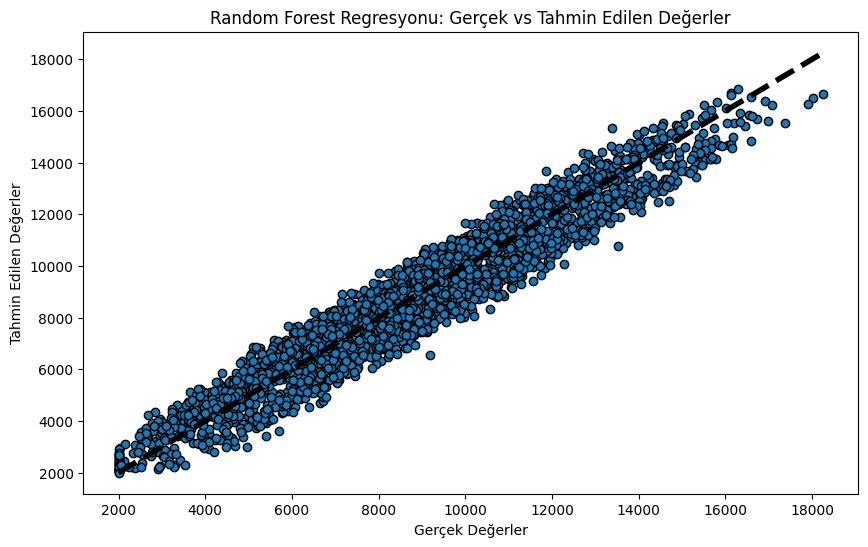

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Regresyonu: Gerçek vs Tahmin Edilen Değerler')